In [2]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#importing 4 games data for 2_19 - 2_24
path = "/Users/GeorgeQiao/Desktop/Baseball"
all_files = glob.glob(os.path.join(path,"SJSU vs*.csv"))
df_from_each_file = (pd.read_csv(f) for f in all_files)
data = pd.concat(df_from_each_file, ignore_index=True)

In [4]:
data.shape

(1303, 75)

In [5]:
#checking the number of observations is correct
file_1 = pd.read_csv("/Users/GeorgeQiao/Desktop/Baseball/SJSU vs UOP 2.19.19.csv")
file_2 = pd.read_csv("/Users/GeorgeQiao/Desktop/Baseball/SJSU vs UCR 2.22.19.csv")
file_3 = pd.read_csv("/Users/GeorgeQiao/Desktop/Baseball/SJSU vs UCR 2.23.19.csv")
file_4 = pd.read_csv("/Users/GeorgeQiao/Desktop/Baseball/SJSU vs UCR 2.24.19.csv")
file_1.shape[0]+file_2.shape[0]+file_3.shape[0]+file_4.shape[0]

1303

In [6]:
#limit the columns to our interests, below are the explanation of metrics.
#Glossary of Terms: https://trackman.zendesk.com/hc/en-us/articles/115002776647-Radar-Measurement-Glossary-of-Terms?mobile_site=true
#RelSpeed — Speed of pitch, reported in miles per hour, when it leaves the pitcher’s hand.
#SpinRate — How fast the ball is spinning as it leaves the pitcher’s hand, reported in the number of times the pitched ball would spin per minute (“revolutions per minute” or “rpm”).
#pfxx — The horizontal (left-right) movement of the pitch during the last 40 feet before the front of home plate, as compared to a theoretical pitch thrown at the same speed with no spin-induced movement.
#pfxz — The vertical (up-down) movement of the pitch during the last 40 feet before the front of home plate, as compared to a theoretical pitch thrown at the same speed with no spin-induced movement.
#RelHeight — Height, reported in feet, above home plate at which the pitcher releases the ball. 
#RelSide — Distance from the center of the rubber, reported in feet, at which the pitcher releases the ball. Balls thrown from the right side of the mound from the pitcher’s perspective will have a positive number, and balls thrown from the left side of the mound from the pitcher’s perspective have a negative number.
#Extension — The distance, reported in feet, from which the pitcher releases the ball relative to the pitching rubber.
#SpinAxis — Direction the ball is spinning, reported in degrees of tilt. 
    #Note that:
    #A ball thrown with a spin axis of 0 has pure top spin. The top of the ball is moving away from the pitcher and the bottom of the ball is moving away from the batter. This is a classic “12 - 6” curveball. This kind of spin will cause the ball to drop more than gravity would cause alone. 
    #A ball thrown with a spin axis of 180 has pure backspin and is a classic four seam fastball, with the top of the ball moving towards the pitcher and the bottom of the ball moving toward the batter. This kind of spin will cause the ball to drop less that gravity would cause alone. 
    #A ball thrown with a spin axis of 90 is spinning squarely toward the left, from the pitcher’s perspective (and would create a break to the left), while a ball thrown with a spin axis of 270 is spinning squarely toward the right, from the pitcher’s perspective (and would create a break to the right).
#HorzBreak — Distance, measured in inches, between where the pitch actually crosses the front of home plate side-wise, and where it would have crossed home plate side-wise if had it traveled in a perfectly straight line from release. A positive number means the break was to the right from the pitcher’s perspective, while a negative number means the break was to the left from the pitcher’s perspective.
#VertBreak — Distance, measured in inches, between where the pitch actually crosses the front of home plate height-wise, and where it would have crossed home plate height-wise if had it traveled in a perfectly straight line from release, completely unaffected by gravity.  
data_metrics = data[["RelSpeed","SpinRate","pfxx","pfxz", "RelHeight", "RelSide", "Extension", "SpinAxis", "HorzBreak", "VertBreak"]]

In [7]:
data_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 10 columns):
RelSpeed     1299 non-null float64
SpinRate     1282 non-null float64
pfxx         1299 non-null float64
pfxz         1299 non-null float64
RelHeight    1299 non-null float64
RelSide      1299 non-null float64
Extension    1299 non-null float64
SpinAxis     1299 non-null float64
HorzBreak    1299 non-null float64
VertBreak    1299 non-null float64
dtypes: float64(10)
memory usage: 101.9 KB


In [8]:
data_metrics.describe()

,RelSpeed,SpinRate,pfxx,pfxz,RelHeight,RelSide,Extension,SpinAxis,HorzBreak,VertBreak
count,1299.000000,1282.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,82.238002,2064.675042,-0.555276,7.168098,5.752071,0.215199,6.268697,176.448771,0.896486,-29.504440
std,6.402732,301.461162,6.363398,5.609503,0.545424,2.030603,0.537829,58.206851,10.432375,15.808554
min,52.982104,865.886770,-13.920718,-10.391760,0.987358,-4.117838,4.708658,13.009691,-20.714536,-77.907485
25%,76.601547,1939.509114,-6.052637,4.608208,5.411135,-1.508998,5.884391,144.377300,-8.988623,-39.364536
50%,84.132531,2143.987061,-1.854513,8.934425,5.850665,1.008050,6.246508,190.488770,3.083215,-22.718074
75%,87.055244,2262.933598,5.293575,11.152294,6.125362,1.840211,6.641654,213.124969,9.939417,-17.532923
max,94.242328,2845.789161,12.576576,26.504242,6.899623,3.694511,9.922008,346.668546,21.371364,-8.735169


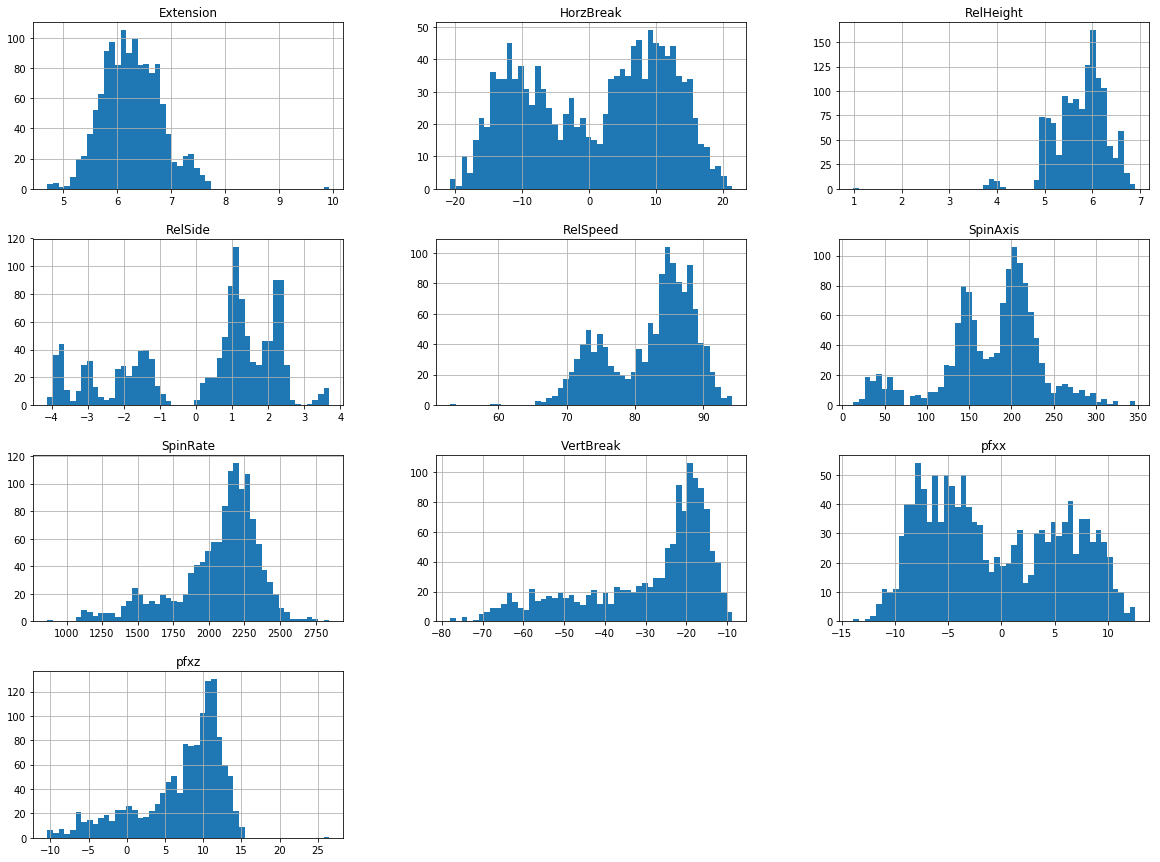

In [9]:
#spinrate has a few outliers, lets see the distributions of each metric
data_metrics.hist(bins=50, figsize=(20,15))
plt.show()

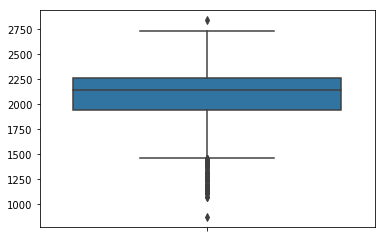

In [10]:
sns.boxplot(y=data_metrics["SpinRate"].as_matrix())

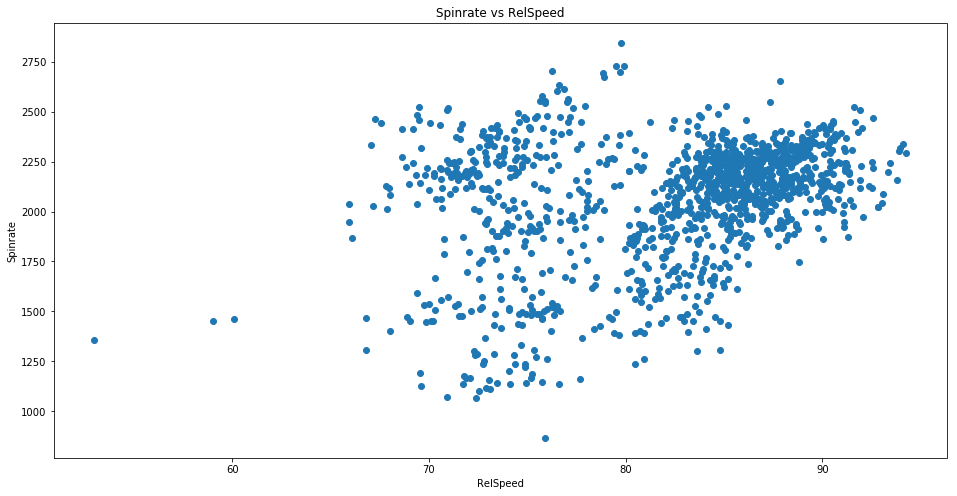

In [11]:
#scatter plot of spinrate vs RelSpeed
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_metrics["RelSpeed"], data_metrics["SpinRate"])
plt.title("Spinrate vs RelSpeed")
ax.set_xlabel('RelSpeed')
ax.set_ylabel('Spinrate')
plt.show()

In [12]:
#it seems like the spinrate suffers from outliers , so we will fill the missing values with median of spinrate
data_metrics["SpinRate"].median()

2143.987061

In [13]:
data_metrics.describe()

,RelSpeed,SpinRate,pfxx,pfxz,RelHeight,RelSide,Extension,SpinAxis,HorzBreak,VertBreak
count,1299.000000,1282.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,82.238002,2064.675042,-0.555276,7.168098,5.752071,0.215199,6.268697,176.448771,0.896486,-29.504440
std,6.402732,301.461162,6.363398,5.609503,0.545424,2.030603,0.537829,58.206851,10.432375,15.808554
min,52.982104,865.886770,-13.920718,-10.391760,0.987358,-4.117838,4.708658,13.009691,-20.714536,-77.907485
25%,76.601547,1939.509114,-6.052637,4.608208,5.411135,-1.508998,5.884391,144.377300,-8.988623,-39.364536
50%,84.132531,2143.987061,-1.854513,8.934425,5.850665,1.008050,6.246508,190.488770,3.083215,-22.718074
75%,87.055244,2262.933598,5.293575,11.152294,6.125362,1.840211,6.641654,213.124969,9.939417,-17.532923
max,94.242328,2845.789161,12.576576,26.504242,6.899623,3.694511,9.922008,346.668546,21.371364,-8.735169


In [14]:
data_metrics.dropna(how="all", inplace=True)

/Users/GeorgeQiao/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
#reindexing, since we removed a row with nas
data_metrics = data_metrics.reset_index(drop=True)

In [16]:
data_metrics.shape

(1299, 10)

In [17]:
data_metrics["SpinRate"].fillna(data_metrics["SpinRate"].median(), inplace=True)

In [18]:
data_metrics.describe()

,RelSpeed,SpinRate,pfxx,pfxz,RelHeight,RelSide,Extension,SpinAxis,HorzBreak,VertBreak
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,82.238002,2065.712998,-0.555276,7.168098,5.752071,0.215199,6.268697,176.448771,0.896486,-29.504440
std,6.402732,299.616243,6.363398,5.609503,0.545424,2.030603,0.537829,58.206851,10.432375,15.808554
min,52.982104,865.886770,-13.920718,-10.391760,0.987358,-4.117838,4.708658,13.009691,-20.714536,-77.907485
25%,76.601547,1943.554432,-6.052637,4.608208,5.411135,-1.508998,5.884391,144.377300,-8.988623,-39.364536
50%,84.132531,2143.987061,-1.854513,8.934425,5.850665,1.008050,6.246508,190.488770,3.083215,-22.718074
75%,87.055244,2260.533347,5.293575,11.152294,6.125362,1.840211,6.641654,213.124969,9.939417,-17.532923
max,94.242328,2845.789161,12.576576,26.504242,6.899623,3.694511,9.922008,346.668546,21.371364,-8.735169


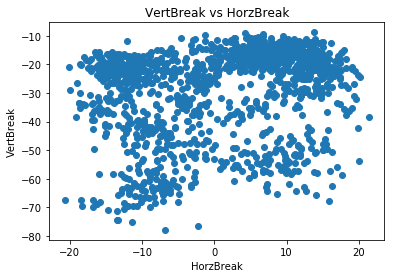

In [19]:
#now we have filled the missing values, we can start working on the first problem:
#Is there a correlation between “HorzBreak”/“VertBreak” (not InducedVertBreak) and pfxx/pfxz? 
#One correlation would be between HorzBreak and pfxx, while the second would be between VertBreak and pfxz. 
#If so what is the R^2? Is the sample size large enough to give us real answers?
plt.scatter(data_metrics["HorzBreak"], data_metrics["VertBreak"])
plt.title("VertBreak vs HorzBreak")
plt.xlabel("HorzBreak")
plt.ylabel("VertBreak")
plt.show()

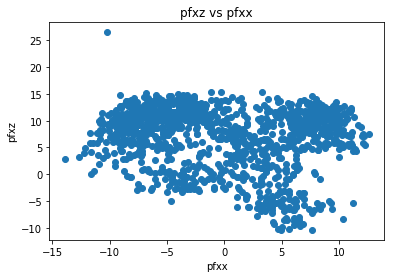

In [20]:
plt.scatter(data_metrics["pfxx"], data_metrics["pfxz"])
plt.title("pfxz vs pfxx")
plt.xlabel("pfxx")
plt.ylabel("pfxz")
plt.show()

In [21]:
data_metrics.describe()

,RelSpeed,SpinRate,pfxx,pfxz,RelHeight,RelSide,Extension,SpinAxis,HorzBreak,VertBreak
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,82.238002,2065.712998,-0.555276,7.168098,5.752071,0.215199,6.268697,176.448771,0.896486,-29.504440
std,6.402732,299.616243,6.363398,5.609503,0.545424,2.030603,0.537829,58.206851,10.432375,15.808554
min,52.982104,865.886770,-13.920718,-10.391760,0.987358,-4.117838,4.708658,13.009691,-20.714536,-77.907485
25%,76.601547,1943.554432,-6.052637,4.608208,5.411135,-1.508998,5.884391,144.377300,-8.988623,-39.364536
50%,84.132531,2143.987061,-1.854513,8.934425,5.850665,1.008050,6.246508,190.488770,3.083215,-22.718074
75%,87.055244,2260.533347,5.293575,11.152294,6.125362,1.840211,6.641654,213.124969,9.939417,-17.532923
max,94.242328,2845.789161,12.576576,26.504242,6.899623,3.694511,9.922008,346.668546,21.371364,-8.735169


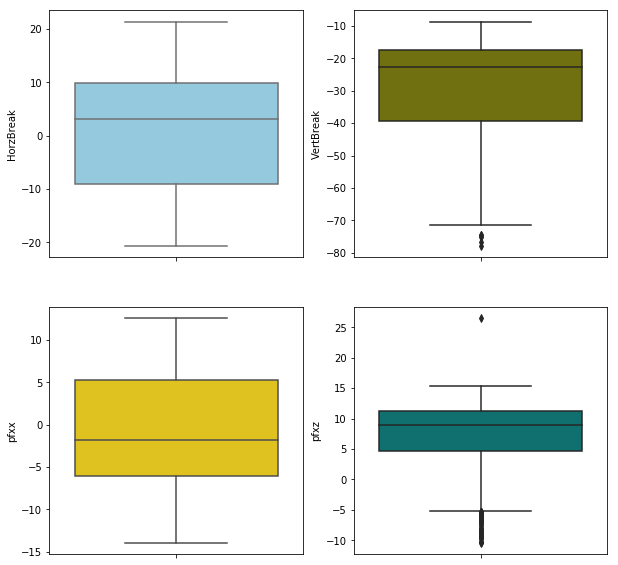

In [22]:
f, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True)
sns.boxplot(y=data_metrics["HorzBreak"] , color="skyblue", ax=axes[0, 0])
sns.boxplot(y=data_metrics["VertBreak"] , color="olive", ax=axes[0, 1])
sns.boxplot(y=data_metrics["pfxx"] , color="gold", ax=axes[1, 0])
sns.boxplot(y=data_metrics["pfxz"] , color="teal", ax=axes[1, 1])

In [23]:
#Notice the VertBreak and pfxz have significantly higher amount of outliers than HorzBreak and pfxx
#we can remove the outliers for the z-score > 3
z_VertBreak = np.abs(stats.zscore(data_metrics["VertBreak"]))
z_pfxz = np.abs(stats.zscore(data_metrics["pfxz"]))
z_HorzBreak = np.abs(stats.zscore(data_metrics["HorzBreak"]))
z_pfxx = np.abs(stats.zscore(data_metrics["pfxx"]))
threshold = 3

In [24]:
np.where(z_VertBreak > 3)

(array([225]),)

In [25]:
np.where(z_pfxz > 3)

(array([ 91, 688, 691, 799, 800, 812, 813]),)

In [26]:
np.where(z_HorzBreak > 3)

(array([], dtype=int64),)

In [27]:
np.where(z_pfxx > 3)

(array([], dtype=int64),)

In [28]:
data_metrics["VertBreak"][(z_VertBreak > 3)]

225   -77.907485
Name: VertBreak, dtype: float64

In [29]:
data_metrics["pfxz"][(z_pfxz > 3)]

91     26.504242
688   -10.391760
691   -10.319555
799    -9.870888
800   -10.272708
812    -9.677321
813   -10.330318
Name: pfxz, dtype: float64

In [30]:
#so we will remove the observation 225 in VertBreak
data_metrics = data_metrics[z_VertBreak < 3]

In [31]:
#remove observations 91, 688, 691, 799, 800, 812 and 813 in pfxz
data_metrics.drop(data_metrics.index[[91, 688, 691, 799, 800, 812, 813]], inplace=True)

In [32]:
data_metrics.describe()

,RelSpeed,SpinRate,pfxx,pfxz,RelHeight,RelSide,Extension,SpinAxis,HorzBreak,VertBreak
count,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000
mean,82.305165,2065.469226,-0.572737,7.205805,5.758811,0.209194,6.266223,176.933603,0.937034,-29.348264
std,6.321669,298.732367,6.364621,5.528081,0.527693,2.033343,0.529544,57.864815,10.431222,15.661112
min,59.035198,865.886770,-13.920718,-10.391760,3.811241,-4.117838,4.708658,13.009691,-20.714536,-76.688809
25%,76.665822,1943.554432,-6.067338,4.698114,5.414852,-1.513423,5.883184,144.587713,-8.948746,-38.627422
50%,84.187783,2143.987061,-1.896976,8.944625,5.855262,1.006123,6.246820,190.678869,3.165751,-22.678749
75%,87.076451,2259.849238,5.252380,11.152294,6.129148,1.844268,6.641654,213.309907,9.964300,-17.482514
max,94.242328,2845.789161,12.576576,15.342412,6.899623,3.694511,7.730873,346.668546,21.371364,-8.735169


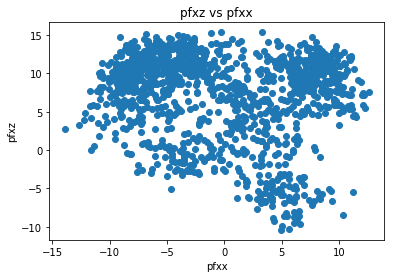

In [33]:
plt.scatter(data_metrics["pfxx"], data_metrics["pfxz"])
plt.title("pfxz vs pfxx")
plt.xlabel("pfxx")
plt.ylabel("pfxz")
plt.show()

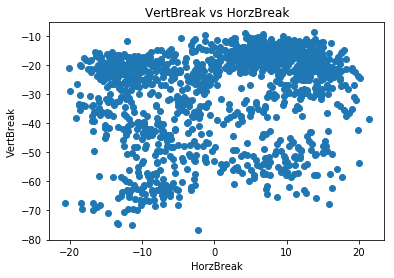

In [34]:
plt.scatter(data_metrics["HorzBreak"], data_metrics["VertBreak"])
plt.title("VertBreak vs HorzBreak")
plt.xlabel("HorzBreak")
plt.ylabel("VertBreak")
plt.show()

In [35]:
#now the outliers are taken care of, we can start working on the correlation. 
#correlation between HorzBreak， VertBreak， pfxx and pfxz
corr_HorzB_VerB_pfxx_pfxz = data_metrics[["HorzBreak","VertBreak", "pfxx", "pfxz"]].corr()
corr_HorzB_VerB_pfxx_pfxz

,HorzBreak,VertBreak,pfxx,pfxz
HorzBreak,1.000000,0.239349,-0.993234,0.195656
VertBreak,0.239349,1.000000,-0.234776,0.957732
pfxx,-0.993234,-0.234776,1.000000,-0.185633
pfxz,0.195656,0.957732,-0.185633,1.000000


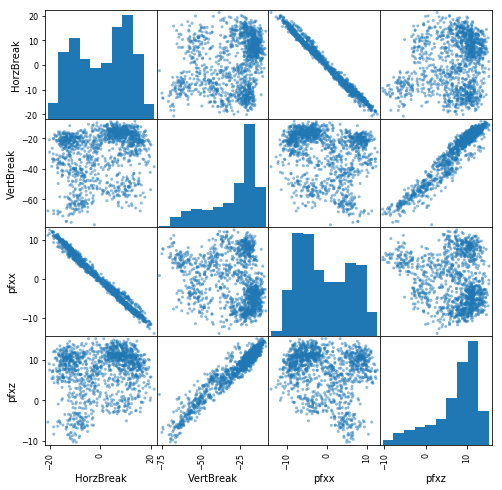

In [36]:
#scatter matrix
pd.plotting.scatter_matrix(data_metrics[["HorzBreak","VertBreak", "pfxx", "pfxz"]], figsize=(8, 8))
plt.show()

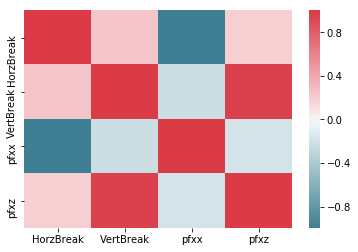

In [37]:
#heatmap
sns.heatmap(corr_HorzB_VerB_pfxx_pfxz, cmap = sns.diverging_palette(220, 10, as_cmap=True))

In [38]:
#R^2
corr_HorzB_VerB_pfxx_pfxz**2

,HorzBreak,VertBreak,pfxx,pfxz
HorzBreak,1.000000,0.057288,0.986513,0.038281
VertBreak,0.057288,1.000000,0.055120,0.917251
pfxx,0.986513,0.055120,1.000000,0.034460
pfxz,0.038281,0.917251,0.034460,1.000000


In [39]:
#What are the averages & standard deviation for each pitch for all SJSU pitcher’s “metrics”? 
#Obviously some players will only throw a Fastball and a Curveball so you do not need to try 
#to find out metrics on a slider if a pitcher does not throw that particular pitch.
data_metrics_extra = data[["Pitcher","AutoPitchType","PitcherSet","Inning","RelSpeed","SpinRate","pfxx","pfxz", "RelHeight", "RelSide", "Extension", "SpinAxis", "HorzBreak", "VertBreak"]]

In [40]:
data_metrics_extra.describe()

,Inning,RelSpeed,SpinRate,pfxx,pfxz,RelHeight,RelSide,Extension,SpinAxis,HorzBreak,VertBreak
count,1303.000000,1299.000000,1282.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,4.958557,82.238002,2064.675042,-0.555276,7.168098,5.752071,0.215199,6.268697,176.448771,0.896486,-29.504440
std,2.657881,6.402732,301.461162,6.363398,5.609503,0.545424,2.030603,0.537829,58.206851,10.432375,15.808554
min,0.000000,52.982104,865.886770,-13.920718,-10.391760,0.987358,-4.117838,4.708658,13.009691,-20.714536,-77.907485
25%,2.000000,76.601547,1939.509114,-6.052637,4.608208,5.411135,-1.508998,5.884391,144.377300,-8.988623,-39.364536
50%,5.000000,84.132531,2143.987061,-1.854513,8.934425,5.850665,1.008050,6.246508,190.488770,3.083215,-22.718074
75%,7.000000,87.055244,2262.933598,5.293575,11.152294,6.125362,1.840211,6.641654,213.124969,9.939417,-17.532923
max,9.000000,94.242328,2845.789161,12.576576,26.504242,6.899623,3.694511,9.922008,346.668546,21.371364,-8.735169


In [41]:
#remove the missing values
data_metrics_extra.dropna(how="any", inplace=True)

/Users/GeorgeQiao/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [42]:
data_metrics_extra.describe()

,Inning,RelSpeed,SpinRate,pfxx,pfxz,RelHeight,RelSide,Extension,SpinAxis,HorzBreak,VertBreak
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,4.928962,82.311025,2064.545031,-0.612132,7.235631,5.753702,0.204615,6.275627,177.081816,1.005658,-29.302362
std,2.639030,6.405540,301.542940,6.375436,5.612107,0.546018,2.036497,0.533923,58.147978,10.437017,15.799414
min,1.000000,52.982104,865.886770,-13.920718,-10.391760,0.987358,-4.117838,4.708658,13.009691,-20.714536,-77.907485
25%,2.000000,76.667766,1939.497277,-6.105174,4.811491,5.414694,-1.515169,5.889696,145.174038,-8.915952,-38.004096
50%,5.000000,84.218516,2143.983231,-2.044457,9.018051,5.853660,1.006123,6.249794,190.856126,3.306283,-22.489515
75%,7.000000,87.092758,2262.946874,5.243356,11.179174,6.123476,1.836397,6.645202,213.432103,10.008342,-17.463434
max,9.000000,94.242328,2845.789161,12.576576,26.504242,6.899623,3.694511,9.922008,346.668546,21.371364,-8.735169


In [43]:
#remove the outliers
for column in data_metrics_extra.columns[4:]:
    data_metrics_extra = data_metrics_extra[np.abs(stats.zscore(data_metrics_extra[column]))<3]

In [44]:
data_metrics_extra.describe()

,Inning,RelSpeed,SpinRate,pfxx,pfxz,RelHeight,RelSide,Extension,SpinAxis,HorzBreak,VertBreak
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,4.874290,82.753093,2087.125514,-0.553144,7.414128,5.793310,0.148388,6.278262,177.088486,0.943932,-28.477238
std,2.638611,6.055789,273.921105,6.381095,5.506930,0.471927,2.010542,0.530633,57.564672,10.468228,15.379489
min,1.000000,65.920324,1167.182711,-13.920718,-9.450778,4.811231,-4.117838,4.708658,13.009691,-20.714536,-74.542941
25%,2.000000,78.033351,1965.257149,-6.035793,5.252236,5.431103,-1.525621,5.884382,145.354796,-8.951487,-36.030706
50%,5.000000,84.468316,2148.690206,-1.983855,9.203438,5.876108,0.991332,6.255288,190.747333,3.259686,-22.205609
75%,7.000000,87.274937,2264.774941,5.396037,11.224300,6.136122,1.790474,6.653752,212.537473,9.918565,-17.311567
max,9.000000,94.242328,2845.789161,12.576576,15.342412,6.899623,3.071004,7.730873,346.668546,21.371364,-8.735169


In [45]:
data_metrics_extra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 0 to 1302
Data columns (total 14 columns):
Pitcher          1233 non-null object
AutoPitchType    1233 non-null object
PitcherSet       1233 non-null object
Inning           1233 non-null int64
RelSpeed         1233 non-null float64
SpinRate         1233 non-null float64
pfxx             1233 non-null float64
pfxz             1233 non-null float64
RelHeight        1233 non-null float64
RelSide          1233 non-null float64
Extension        1233 non-null float64
SpinAxis         1233 non-null float64
HorzBreak        1233 non-null float64
VertBreak        1233 non-null float64
dtypes: float64(10), int64(1), object(3)
memory usage: 144.5+ KB


In [46]:
#drop the PitcherSet and Inning, then group by Pitcher and AutoPitchType
data_metrics_extra_nopset_noinn = data_metrics_extra.drop(["PitcherSet", "Inning"],axis=1)
group_pitcher_pType = data_metrics_extra_nopset_noinn.groupby(['Pitcher','AutoPitchType'])

In [47]:
group_pitcher_pType.describe(percentiles=[]).to_csv("pitcher_pitchtype_metrics.csv")

In [48]:
#drop the Inning, then group by Pitcher and PitcherSet
data_metrics_extra_noinn = data_metrics_extra.drop(["Inning"], axis=1)
group_pitcher_pset = data_metrics_extra_noinn.groupby(['Pitcher','PitcherSet'])
group_pitcher_pset.describe(percentiles=[]).to_csv("pitcher_pitcherset_metrics.csv")

In [49]:
group_pitcher_pset.mean().head()

RelSpeed     SpinRate      pfxx       pfxz  \
Pitcher          PitcherSet                                                
Bateson, Trevor  Stretch     80.155659  2001.520884 -3.534184   6.687765   
                 Windup      84.741985  1896.229114 -8.108561  10.730158   
Birdsong, Elijah Stretch     89.352951  2019.869227 -8.404594   8.506592   
                 Windup      86.288958  2072.693328 -5.976160   7.684790   
Cadola, Tevin    Stretch     84.664712  2375.930549 -2.556661   6.491011   

                             RelHeight   RelSide  Extension    SpinAxis  \
Pitcher          PitcherSet                                               
Bateson, Trevor  Stretch      5.903779  0.788019   6.102488  179.177382   
                 Windup       5.964734  0.765932   6.076454  214.713558   
Birdsong, Elijah Stretch      6.108538  1.039692   5.651999  225.047434   
                 Windup       6.167241  0.980720   5.681723  190.200873   
Cadola, Tevin    Stretch      5.797047  2.048196   6.524788  156.819369   

                             HorzBreak  VertBreak  
Pitcher          PitcherSet                        
Bateson, Trevor  Stretch      5.311119 -32.374045  
                 Windup      13.336455 -19.643037  
Birdsong, Elijah Stretch     14.681074 -20.699618  
                 Windup      10.124167 -25.676723  
Cadola, Tevin    Stretch      3.026752 -28.167735

In [50]:
group_pitcher_pType_pset_mean = group_pitcher_pset.mean()

In [51]:
group_pitcher_pType_pset_mean.iloc[0]

RelSpeed       80.155659
SpinRate     2001.520884
pfxx           -3.534184
pfxz            6.687765
RelHeight       5.903779
RelSide         0.788019
Extension       6.102488
SpinAxis      179.177382
HorzBreak       5.311119
VertBreak     -32.374045
Name: (Bateson, Trevor, Stretch), dtype: float64

In [52]:
group_pitcher_pType_pset_mean.index[38]

('Polack, Ben\t', 'Undefined')

In [53]:
group_pitcher_pType_pset_mean = group_pitcher_pType_pset_mean.drop(group_pitcher_pType_pset_mean.index[38])

In [54]:
metrics_stretch_windup = pd.DataFrame(columns=list(group_pitcher_pType_pset_mean))
one_pset = ['Haffar, Abbott', 'Priddy, Jeremiah', 'Tucker, Cole','Wallace, Zach']

In [55]:
for i in range(1,len(group_pitcher_pType_pset_mean.index)):
    if group_pitcher_pType_pset_mean.index[i][0] == group_pitcher_pType_pset_mean.index[i-1][0] and group_pitcher_pType_pset_mean.index[i-1][1] == 'Stretch' and group_pitcher_pType_pset_mean.index[i][1] == 'Windup': 
        difference_stretch_windup = group_pitcher_pType_pset_mean.iloc[i] - group_pitcher_pType_pset_mean.iloc[i-1]
        difference_stretch_windup.name = group_pitcher_pType_pset_mean.index[i-1][0]
        metrics_stretch_windup = metrics_stretch_windup.append(difference_stretch_windup)
        i += 2
    elif group_pitcher_pType_pset_mean.index[i][0] in one_pset:
        i += 1
  

In [427]:
metrics_stretch_windup.to_csv("windup_stretch_comparison.csv")

In [57]:
#For Polack, Mitchel & Cadola (last names) how did the “metrics” fluctuate as they pitched more innings? 
#Example: Was Cadola’s Fastball spin rate different in his 4th inning than his 1st inning?
polack = data_metrics_extra[data_metrics_extra['Pitcher'] == 'Polack, Ben\t']
mitchel = data_metrics_extra[data_metrics_extra['Pitcher'] == 'Mitchel, Andrew']
cadola = data_metrics_extra[data_metrics_extra['Pitcher'] == 'Cadola, Tevin']
polack_group_inn = polack.groupby(['Inning'])
mitchel_group_inn = mitchel.groupby(['Inning'])
cadola_group_inn = cadola.groupby(['Inning'])

In [58]:
polack_group_inn.mean()

,RelSpeed,SpinRate,pfxx,pfxz,RelHeight,RelSide,Extension,SpinAxis,HorzBreak,VertBreak
Inning,,,,,,,,,,
1,80.878552,2202.859889,6.212318,6.928978,5.048876,-3.052953,6.147050,162.015744,-8.935062,-30.698363
2,81.318886,2271.593880,5.780990,7.751324,5.112298,-3.003222,6.212592,169.091424,-7.865361,-28.796522
3,81.510023,2254.853114,5.627364,7.303273,5.049061,-3.013980,6.218087,167.646068,-7.757104,-29.569005
4,83.215988,2230.437956,7.673944,9.183232,5.056434,-3.109136,6.299918,149.629355,-11.664374,-23.950521
5,82.038160,2246.722221,5.815688,7.161642,5.025117,-3.142212,6.159119,169.367663,-8.144392,-29.051375


In [59]:
mitchel_group_inn.mean()

,RelSpeed,SpinRate,pfxx,pfxz,RelHeight,RelSide,Extension,SpinAxis,HorzBreak,VertBreak
Inning,,,,,,,,,,
1,86.845319,2156.170542,7.888061,9.285328,5.640744,-3.780440,5.837907,150.530561,-11.597393,-21.068386
2,84.557061,2130.853960,4.360321,9.071631,5.517966,-3.830349,5.812526,172.778562,-5.143129,-23.922435
3,80.145980,2227.816154,2.482715,4.446064,5.335641,-3.817276,5.619972,205.397616,-1.798710,-37.376556
4,82.237019,2205.459274,3.829912,7.410485,5.409536,-3.803101,5.713288,180.288863,-4.384214,-28.859527
5,81.628065,2265.167835,2.416474,4.430773,5.289064,-3.751051,5.693923,197.662992,-1.906293,-35.225649
6,83.839396,2089.487990,7.589282,8.186352,5.347668,-3.763872,5.752969,153.912653,-11.351698,-25.942128


In [60]:
cadola_group_inn.mean()

,RelSpeed,SpinRate,pfxx,pfxz,RelHeight,RelSide,Extension,SpinAxis,HorzBreak,VertBreak
Inning,,,,,,,,,,
1,89.427672,2332.651584,-4.671488,10.035907,5.761312,2.269377,6.634530,200.385721,7.198749,-17.366465
2,87.058452,2388.543429,-4.062639,8.299461,5.835658,2.167545,6.580071,182.561165,5.778862,-22.604793
3,86.070692,2205.327939,-3.518138,8.513581,5.791375,2.308212,6.657416,190.106948,4.873289,-22.636773
4,83.597140,2270.817666,-2.753224,6.603482,5.831734,1.869517,6.656304,155.275084,3.207906,-29.217453
5,81.872462,2504.692518,1.258712,2.030128,5.859275,2.099753,6.173073,114.699484,-3.480242,-39.037945
6,86.672391,2394.373857,-3.765256,7.460964,5.709154,2.186075,6.548298,173.729550,5.315330,-24.457110


In [61]:
polack_group_inn_norm = (polack_group_inn.mean() - polack_group_inn.mean().mean()) / (polack_group_inn.mean().max() - polack_group_inn.mean().min())
mitchel_group_inn_norm = (mitchel_group_inn.mean() - mitchel_group_inn.mean().mean()) / (mitchel_group_inn.mean().max() - mitchel_group_inn.mean().min())
cadola_group_inn_norm = (cadola_group_inn.mean() - cadola_group_inn.mean().mean()) / (cadola_group_inn.mean().max() - cadola_group_inn.mean().min())

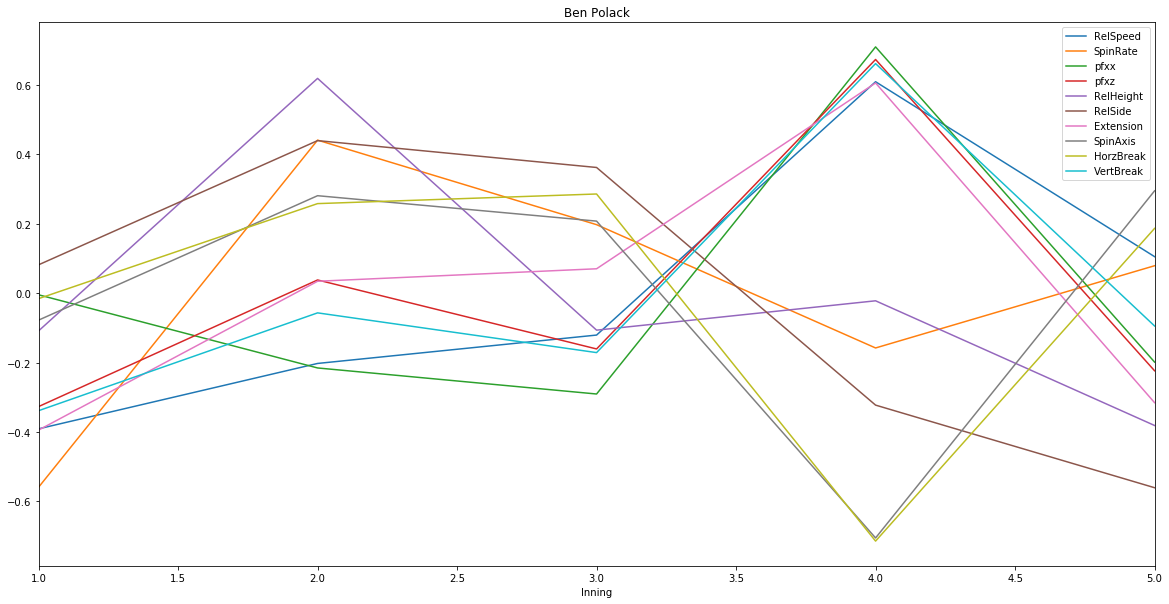

In [62]:
polack_group_inn_norm.plot(figsize=(20,10))
plt.title("Ben Polack")

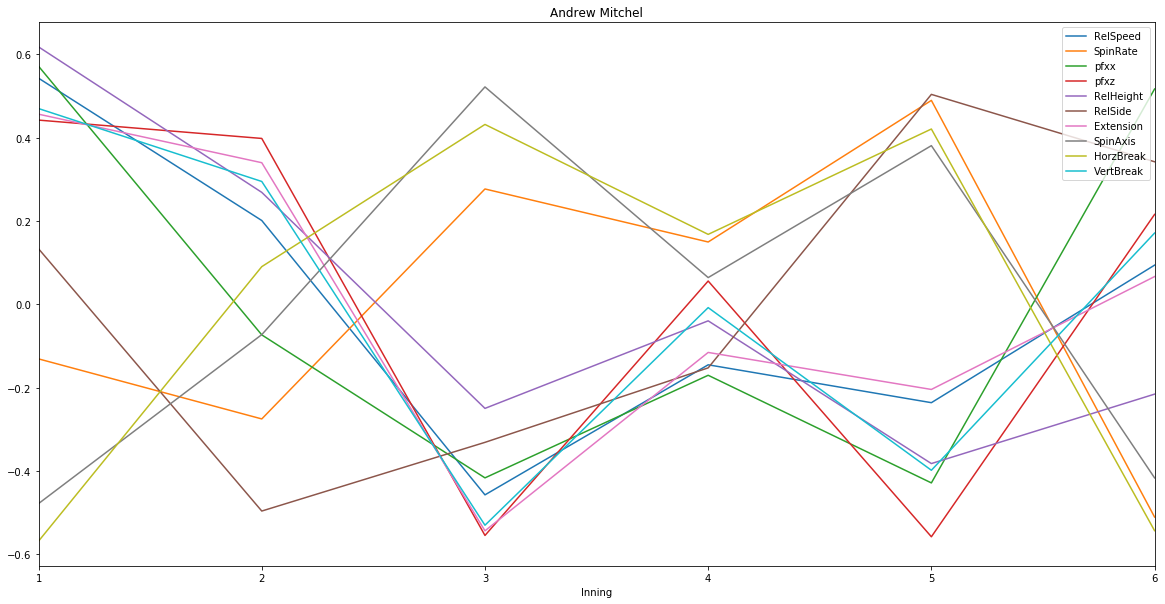

In [63]:
mitchel_group_inn_norm.plot(figsize=(20,10))
plt.title("Andrew Mitchel")

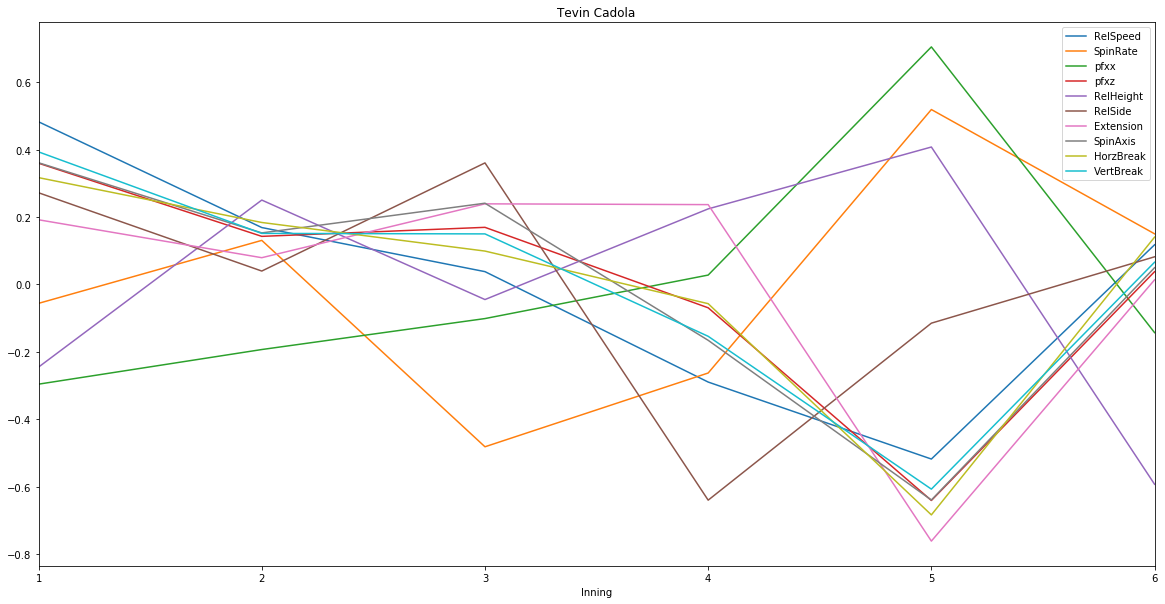

In [64]:
cadola_group_inn_norm.plot(figsize=(20,10))
plt.title("Tevin Cadola")

In [415]:
#For each SJSU pitcher, how often was each pitch thrown per inning? 
pitchT_percent = data[["Pitcher","AutoPitchType","Inning"]]

In [416]:
pitchT_percent_group = pitchT_percent.groupby(["Pitcher","Inning","AutoPitchType"])

In [417]:
pitchT_percent_group_clean = pitchT_percent_group.size().to_frame().reset_index()

In [418]:
pitchT_percent_group_clean = pitchT_percent_group_clean.rename(columns= {0: 'Count'})

In [419]:
sum_pitch_per_inning = pitchT_percent_group_clean.groupby(["Pitcher","Inning"]).sum()

In [420]:
pitchT_percent_group_clean["Total count"] = 0
pitchT_percent_group_clean["Percentage"] = 0

In [421]:
sum_pitch_per_inning_list = sum_pitch_per_inning[["Count"]].values.tolist()

In [423]:
j=0
for i in range(1, len(pitchT_percent_group_clean)):
    if pitchT_percent_group_clean.iloc[i-1][0] == pitchT_percent_group_clean.iloc[i][0] and pitchT_percent_group_clean.iloc[i-1][1] == pitchT_percent_group_clean.iloc[i][1]:
        pitchT_percent_group_clean.set_value(i-1, "Total count", sum_pitch_per_inning_list[j][0])
    else:
        pitchT_percent_group_clean.set_value(i-1, "Total count", sum_pitch_per_inning_list[j][0])
        j +=1

In [429]:
for i in range(len(pitchT_percent_group_clean)):
    if pitchT_percent_group_clean.iloc[i][4] != 0:
        pitchT_percent_group_clean.loc[i, "Percentage"] = str(int(pitchT_percent_group_clean.iloc[i][3]/pitchT_percent_group_clean.iloc[i][4]*100))+"%"
    else:
        pitchT_percent_group_clean.loc[i, "Percentage"] = "Null"


In [426]:
pitchT_percent_group_clean.to_csv("pitchType_mppercentage.csv")

,Pitcher,Inning,AutoPitchType,Count,Total count,Percentage
0,"Bateson, Trevor",8,ChangeUp,3,26,11%
1,"Bateson, Trevor",8,Curveball,2,26,7%
2,"Bateson, Trevor",8,Fastball,17,26,65%
3,"Bateson, Trevor",8,Other,4,26,15%
4,"Birdsong, Elijah",8,Curveball,1,18,5%
